<a href="https://colab.research.google.com/github/NP-15/Deep-Learning/blob/main/Lab01-Binary-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Lab-1
### Binary Classification

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [16]:
 # Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier manipulation
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = y

# Only keep classes 0 (Setosa) and 1 (Versicolor)
data = data[data['target'] != 2]

# Display the first few rows of the dataset
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         100.000000        100.000000         100.000000   
mean            5.471000          3.099000           2.861000   
std             0.641698          0.478739           1.449549   
min             4.300000          2.000000           1.000000   
25%             5.000000          2.800000           1.500000   
50%             5.400000          3.050000           2.450000   
75%             5.900000          3.400000           4.325000   
max             7.000000          4.400000           5.100000   

       petal width (cm)      target  
count        100.000000  100.000000  
mean           0.786000    0.500000  
std            0.565153    0.502519  
min            0.100000    0.000000  
25%            0.200000    0.000000  
50%            0.800000    0.500000  
75%            1.300000    1.000000  
max            1.800000    1.000000  
target
0    50
1    50
Name: count, dtype: int64


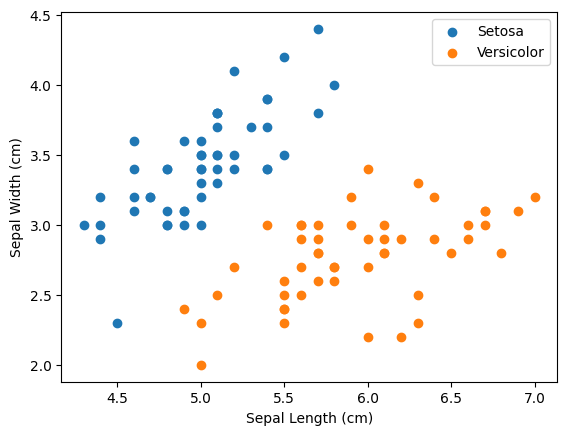

In [17]:
# Summary statistics
print(data.describe())

# Class distribution
print(data['target'].value_counts())

# Visualize the data
plt.scatter(data[data['target'] == 0]['sepal length (cm)'], data[data['target'] == 0]['sepal width (cm)'], label='Setosa')
plt.scatter(data[data['target'] == 1]['sepal length (cm)'], data[data['target'] == 1]['sepal width (cm)'], label='Versicolor')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

In [18]:
# Split the data into features and target variable
X = data.drop('target', axis=1).values
y = data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Initialize and train the Perceptron model
perceptron = Perceptron(max_iter=40, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:


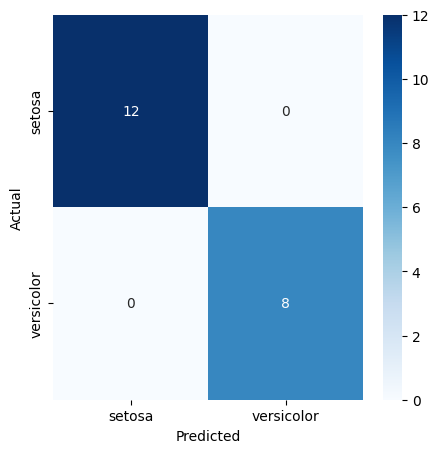

In [24]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names[:2], yticklabels=iris.target_names[:2])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model Coefficients: [[ 0.56214556 -0.35288568]]
Model Intercept: [0.2]


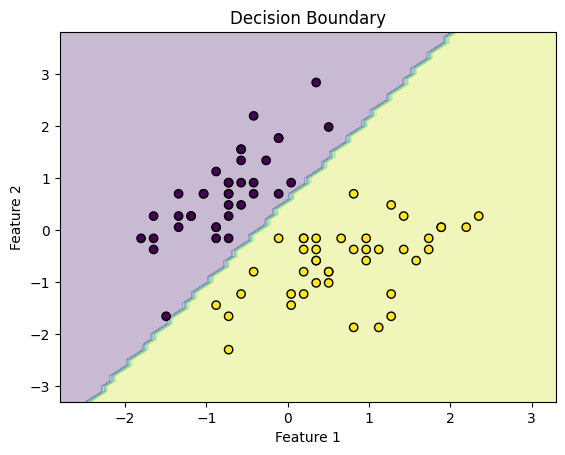

In [25]:
# Printing parameters
print("Model Coefficients:", perceptron.coef_)
print("Model Intercept:", perceptron.intercept_)

# Visualize decision boundary (only for the first two features)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k',
marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()